## Подготовительная работа

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 12) for n in range(1, 12)])
# rows += 
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('Длина проводника, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax, res

def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax, res

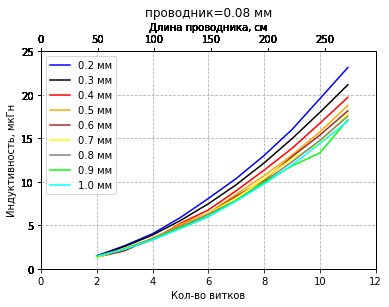

In [3]:
ax_coil_n_008, _ = plot_step_stat(rects, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.08, color=col, ax=ax_coil_n_008)

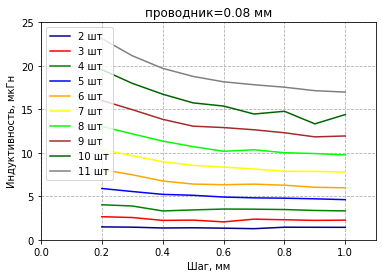

In [4]:
ax_step_008, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.08, ax=ax_step_008, color=col)

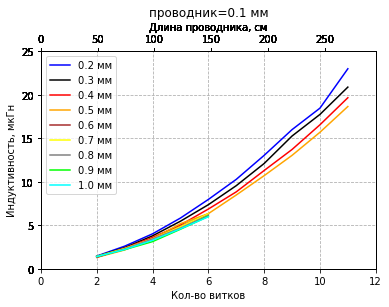

In [5]:
ax_coil_n_01, _ = plot_step_stat(rects, step=0.2, wire=0.1, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.1, color=col, ax=ax_coil_n_01)

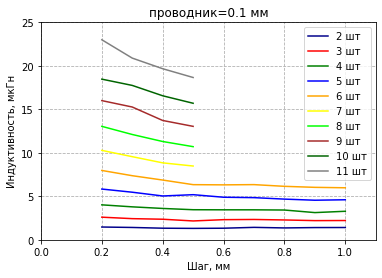

In [6]:
ax_step_01, res = plot_coil_n_stat(rects, coil_n=2, wire=0.1, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.1, color=col, ax=ax_step_01)

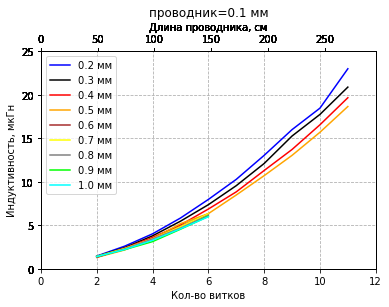

In [7]:
ax_coil_n_changed, _ = plot_step_stat(rects, step=0.2, wire=0.1, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['black', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.1, color=col, ax=ax_coil_n_changed)

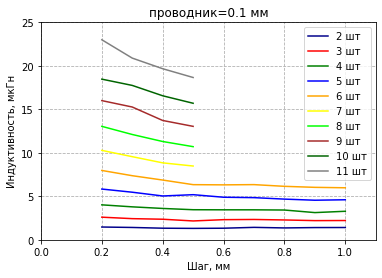

In [8]:
ax_step_changed, res = plot_coil_n_stat(rects, coil_n=2, wire=0.1, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.1, color=col, ax=ax_step_changed)

## 0.3 мм шаг, 4 витка, провод 0.08 мм, трапециевидные зубцы:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
298,VID119,104.940,0.08,0.3,4.0,45.2,79.0,4.026,19350.0,60.0,trap-teeth-1,+
300,VID1191,106.742,0.08,0.3,4.0,79.0,45.0,3.997,19500.0,61.0,trap-teeth-3,+
302,VID1192,110.957,0.08,0.3,4.0,45.2,79.0,4.022,19430.0,60.0,trap-teeth-6,+


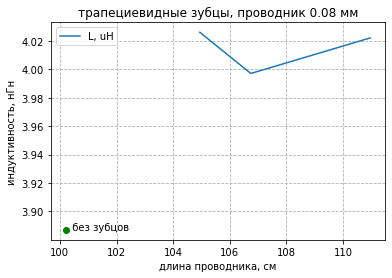

In [27]:
rects_vid119_008 = df.loc[df['file'].str.match('VID119')]
rects_vid119_008 = rects_vid119_008.loc[rects_vid119_008['wire_dia (mm)'] == 0.08]
ts_008 = [int(v[-1]) for v in rects_vid119_008['mod']]
ls_008 = list(rects_vid119_008['L, uH'])

rect_4_03_008 = df.loc[(df['file'] == 'V303') & (df['wire_dia (mm)'] == 0.08)]

ax = rects_vid119_008.plot(x='wire_len (cm)', y='L, uH', title='трапециевидные зубцы, проводник 0.08 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

ref_len = rect_4_03_008['wire_len (cm)']
ref_L = rect_4_03_008['L, uH']
ax.plot(ref_len, ref_L, 'go')
ax.text(ref_len, ref_L, '  без зубцов')

rects_vid119_008

<ipython-input-28-5651366a8936>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rect_4_03_008['Lsqrt'] = rect_4_03_008['L, uH'].apply(lambda x: 1/math.sqrt(x))


Text(84    0.507216
Name: Lsqrt, dtype: float64, 84    19940.0
Name: freq, dtype: float64, '  без зубцов')

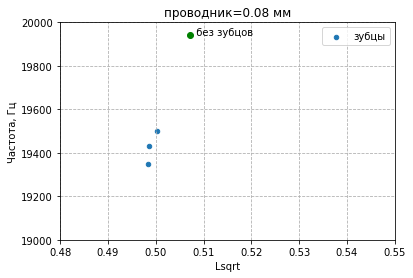

In [28]:
rects_vid119_008['Lsqrt'] = rects_vid119_008['L, uH'].apply(lambda x: 1/math.sqrt(x))
ax = rects_vid119_008.plot.scatter(x='Lsqrt', y='freq', title=f'проводник=0.08 мм', label='зубцы')
ax.grid(linestyle='--')
ax.set_xlim(0.48, 0.55)
ax.set_ylim(19000, 20000)
ax.set_ylabel('Частота, Гц')
ax.set_xlabel('Lsqrt')

rect_4_03_008['Lsqrt'] = rect_4_03_008['L, uH'].apply(lambda x: 1/math.sqrt(x))
ref_Lsqrt = rect_4_03_008['Lsqrt']
ref_freq = rect_4_03_008['freq']

ax.plot(ref_Lsqrt, ref_freq, 'go')
ax.text(ref_Lsqrt, ref_freq, '  без зубцов')

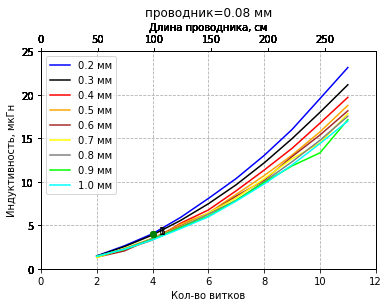

In [10]:
for t, l in zip(ts_008, ls_008):
    ax_coil_n_008.plot(4, l, 'go')
    ax_coil_n_008.text(4, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_008.figure

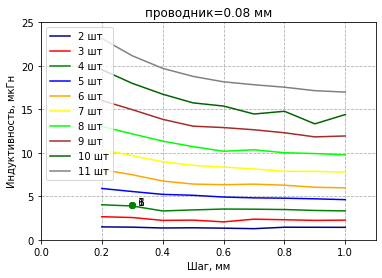

In [11]:
for t, l in zip(ts_008, ls_008):
    ax_step_008.plot(0.3, l, 'go')
    ax_step_008.text(0.3, l, f'  {t}')

ax_step_008.figure

## 0.3 мм шаг, 4 витка, провод 0.1 мм, трапециевидные зубцы:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
299,VID119,104.940,0.1,0.3,4.0,45.2,79.0,3.921,19670.0,66.0,trap-teeth-1,+
301,VID1191,106.742,0.1,0.3,4.0,79.0,45.0,3.684,19780.0,69.0,trap-teeth-3,+
303,VID1192,110.957,0.1,0.3,4.0,45.2,79.0,3.946,19640.0,66.0,trap-teeth-6,+


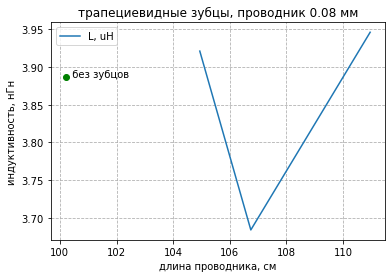

In [30]:
rects_vid119_01 = df.loc[(df['file'].str.match('VID119')) & (df['mod'].str.match('trap-teeth'))]
rects_vid119_01 = rects_vid119_01.loc[rects_vid119_01['wire_dia (mm)'] == 0.1]
ts_01 = [int(v[-1]) for v in list(rects_vid119_01['mod'])[:3]]
ls_01 = list(rects_vid119_01['L, uH'])[:3]

rect_4_03_01 = df.loc[(df['file'] == 'V303') & (df['wire_dia (mm)'] == 0.08)]

ax = rects_vid119_01.plot(x='wire_len (cm)', y='L, uH', title='трапециевидные зубцы, проводник 0.08 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

ref_len = rect_4_03_01['wire_len (cm)']
ref_L = rect_4_03_01['L, uH']
ax.plot(ref_len, ref_L, 'go')
ax.text(ref_len, ref_L, '  без зубцов')

rects_vid119_01

<ipython-input-31-25c16a5e32f5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rect_4_03_01['Lsqrt'] = rect_4_03_01['L, uH'].apply(lambda x: 1/math.sqrt(x))


Text(84    0.507216
Name: Lsqrt, dtype: float64, 84    19940.0
Name: freq, dtype: float64, '  без зубцов')

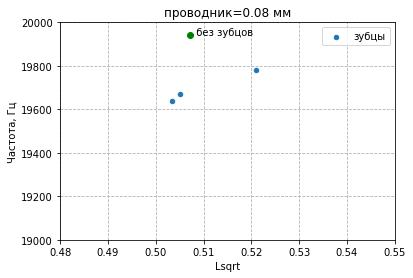

In [31]:
rects_vid119_01['Lsqrt'] = rects_vid119_01['L, uH'].apply(lambda x: 1/math.sqrt(x))
ax = rects_vid119_01.plot.scatter(x='Lsqrt', y='freq', title=f'проводник=0.08 мм', label='зубцы')
ax.grid(linestyle='--')
ax.set_xlim(0.48, 0.55)
ax.set_ylim(19000, 20000)
ax.set_ylabel('Частота, Гц')
ax.set_xlabel('Lsqrt')

rect_4_03_01['Lsqrt'] = rect_4_03_01['L, uH'].apply(lambda x: 1/math.sqrt(x))
ref_Lsqrt = rect_4_03_01['Lsqrt']
ref_freq = rect_4_03_01['freq']

ax.plot(ref_Lsqrt, ref_freq, 'go')
ax.text(ref_Lsqrt, ref_freq, '  без зубцов')

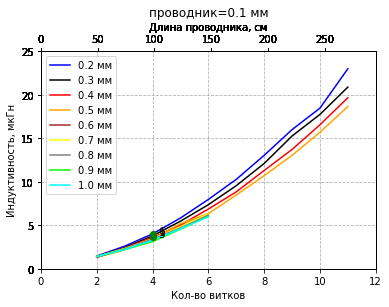

In [13]:
for t, l in zip(ts_01, ls_01):
    ax_coil_n_01.plot(4, l, 'go')
    ax_coil_n_01.text(4, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_01.figure

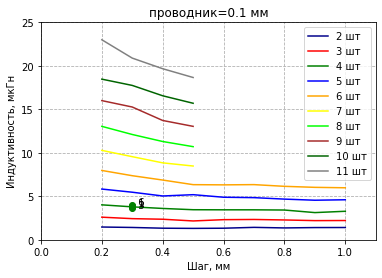

In [14]:
for t, l in zip(ts_01, ls_01):
    ax_step_01.plot(0.3, l, 'go')
    ax_step_01.text(0.3, l, f'  {t}')

ax_step_01.figure

## 0.3 мм шаг, 4 витка, провод 0.1 мм, измененные контуры:

,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done
304,VID1193,121.591,0.1,0.3,5.0,45.1,69.0,5.229,NaN,NaN,rect-inner-round-rect,+
305,VID1195,120.281,0.1,0.3,5.0,45.2,79.0,4.541,18430.0,58.0,rect-inner-reound-corners,+
306,VID1196,94.653,0.1,0.3,4.0,45.2,79.0,4.950,17650.0,60.0,rect-round-corners,+


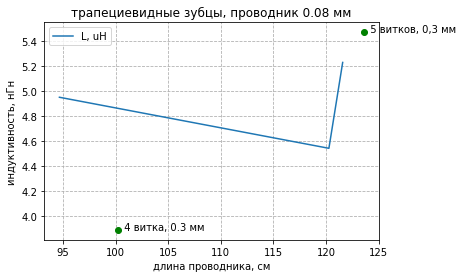

In [39]:
rects_vid119_changed = df.loc[(df['file'].str.match('VID119')) & (df['mod'].str.match('trap-teeth') == False)]
rects_vid119_changed = rects_vid119_changed.loc[rects_vid119_changed['wire_dia (mm)'] == 0.1]
ts_changed = [v for v in list(rects_vid119_changed['mod'])]
ls_changed = list(rects_vid119_changed['L, uH'])

rect_5_03_01 = df.loc[(df['file'] == 'V403') & (df['wire_dia (mm)'] == 0.1)]

ax = rects_vid119_changed.plot(x='wire_len (cm)', y='L, uH', title='трапециевидные зубцы, проводник 0.08 мм')
ax.grid(linestyle='--')
# ax.set_xlim(100, 112)
# ax.set_ylim(3.9, 4.2)
ax.set_ylabel('индуктивность, нГн')
ax.set_xlabel('длина проводника, см')

ref_len = [rect_4_03_01['wire_len (cm)'], rect_5_03_01['wire_len (cm)']]
ref_L = [rect_4_03_01['L, uH'], rect_5_03_01['L, uH']]

for rln, rL, txt in zip(ref_len, ref_L, ['4 витка, 0.3 мм', '5 витков, 0,3 мм']):
    ax.plot(rln, rL, 'go')
    ax.text(rln, rL, f'  {txt}')

rects_vid119_changed

Text(84    0.507216
Name: Lsqrt, dtype: float64, 84    19940.0
Name: freq, dtype: float64, '  4 витка, 0.3 мм')

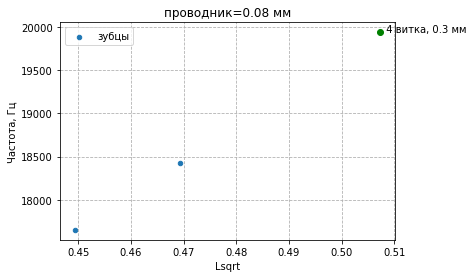

In [47]:
rects_vid119_changed = rects_vid119_changed.loc[rects_vid119_changed['freq'].notna()]
rects_vid119_changed['Lsqrt'] = rects_vid119_changed['L, uH'].apply(lambda x: 1/math.sqrt(x))
ax = rects_vid119_changed.plot.scatter(x='Lsqrt', y='freq', title=f'проводник=0.08 мм', label='зубцы')
ax.grid(linestyle='--')
# ax.set_xlim(0.48, 0.55)
# ax.set_ylim(19000, 20000)
ax.set_ylabel('Частота, Гц')
ax.set_xlabel('Lsqrt')

ref_Lsqrt = rect_4_03_01['Lsqrt']
ref_freq = rect_4_03_01['freq']
ax.plot(ref_Lsqrt, ref_freq, 'go')
ax.text(ref_Lsqrt, ref_freq, f'  4 витка, 0.3 мм')

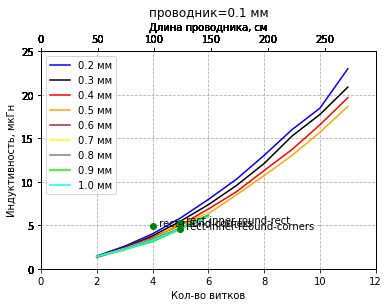

In [16]:
for t, l, n in zip(ts_changed, ls_changed, [5, 5, 4]):
    ax_coil_n_changed.plot(n, l, 'go')
    ax_coil_n_changed.text(n, l, f'  {t}')

# ax.set_xlim(3.75, 4.25)
# ax.set_ylim(4, 4.15)
ax_coil_n_changed.figure

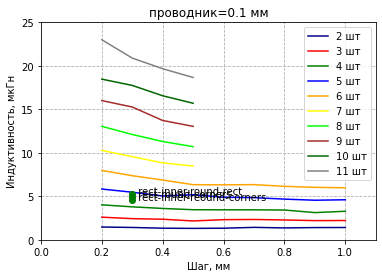

In [17]:
for t, l in zip(ts_changed, ls_changed):
    ax_step_changed.plot(0.3, l, 'go')
    ax_step_changed.text(0.3, l, f'  {t}')

ax_step_changed.figure